In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Concatenate, Input, Conv2D, MaxPooling2D, Reshape, Conv2DTranspose, concatenate, BatchNormalization
np.random.seed(42)
tf.random.set_seed(42)
from sklearn.model_selection import train_test_split

from keras import backend as K

from getdata import get_data
from models import *

In [2]:
images, masks = get_data()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(images.numpy(), masks.numpy(), random_state=42)

In [4]:
model = unet_vgg16()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, name='Adam')
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

with tf.device('/device:gpu:0'):
    training = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

model = unet_vgg16(False)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, name='Adam')
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

with tf.device('/device:gpu:0'):
    training_untrainable = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
27/27 [==============================] - 14s 311ms/step - loss: 0.5660 - accuracy: 0.7087 - val_loss: 0.5371 - val_accuracy: 0.7188
Epoch 2/100
27/27 [==============================] - 8s 309ms/step - loss: 0.4545 - accuracy: 0.7791 - val_loss: 0.4399 - val_accuracy: 0.7892
Epoch 3/100
27/27 [==============================] - 8s 297ms/step - loss: 0.4204 - accuracy: 0.8035 - val_loss: 0.4134 - val_accuracy: 0.8091
Epoch 4/100
27/27 [==============================] - 8s 295ms/step - loss: 0.3831 - accuracy: 0.8271 - val_loss: 0.4099 - val_accuracy: 0.8125
Epoch 5/100
27/27 [==============================] - 8s 310ms/step - loss: 0.4068 - accuracy: 0.8086 - val_loss: 0.3858 - val_accuracy: 0.8280
Epoch 6/100
27/27 [==============================] - 9s 322ms/step - loss: 0.3687 - accuracy: 0.8302 - val_loss: 0.3823 - val_accuracy: 0.8287
Epoch 7/100
27/27 [==============================] - 9s 319ms/step - loss: 0.3280 - accuracy: 0.8556 - val_loss: 0.3801 - val_accuracy: 0.829

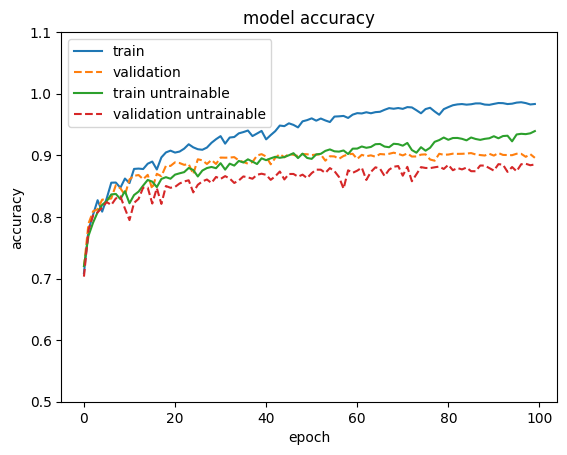

In [7]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'], '--')
plt.plot(training_untrainable.history['accuracy'])
plt.plot(training_untrainable.history['val_accuracy'], '--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'train untrainable', 'validation untrainable'], loc='upper left')
plt.ylim([0.5,1.1])
plt.show()

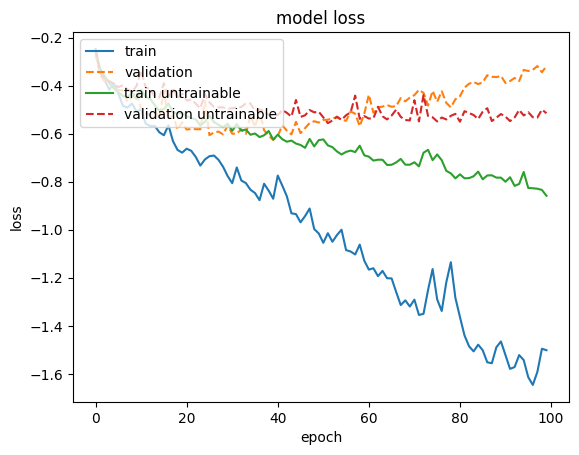

In [8]:
plt.plot(np.log10(training.history['loss']))
plt.plot(np.log10(training.history['val_loss']), '--')
plt.plot(np.log10(training_untrainable.history['loss']))
plt.plot(np.log10(training_untrainable.history['val_loss']), '--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'train untrainable', 'validation untrainable'], loc='upper left')
#plt.ylim([0.5,1.1])
plt.show()

In [9]:
y_pred = model.predict(X_test[:3])

1/1 [==============================] - 1s 1s/step


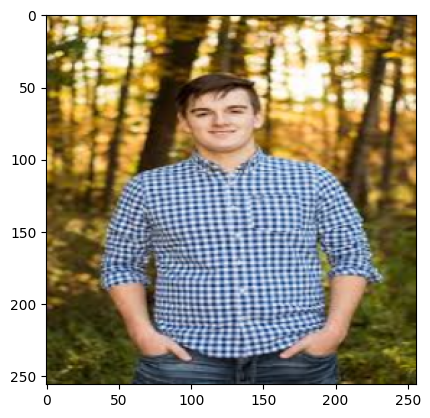

In [10]:
plt.imshow(X_test[2])

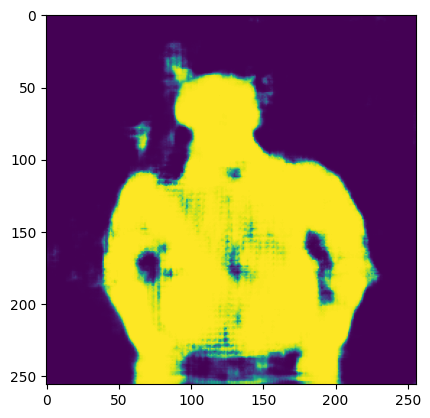

In [11]:
plt.imshow(y_pred[2])